In [1]:
import pandas as pd

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('tvmarketing.csv')

In [18]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [19]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [20]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [21]:
df.shape[0]

200

In [22]:
df.shape

(200, 2)

In [23]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


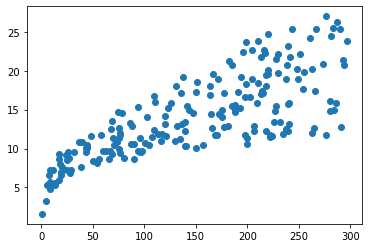

In [28]:
x=df['TV']
y=df['Sales']
plt.scatter(x,y)
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

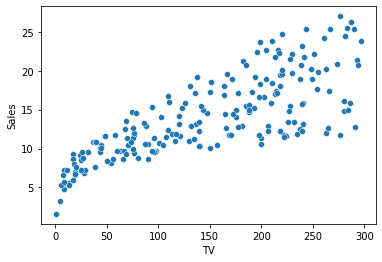

In [29]:
x=df['TV']
y=df['Sales']
sns.scatterplot(x=x,y=y)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [33]:
x_train.shape,y_train.shape

((140,), (140,))

In [37]:
x_test.shape,y_test.shape

((60,), (60,))

In [47]:
x_mean=x_train.mean()
y_mean=y_train.mean()
numerator=np.sum((x_train-x_mean)*(y_train-y_mean))
denominator=np.sum((x_train-x_mean)**2)
slope=(numerator/denominator)

intercept=y_mean-slope*x_mean
print( slope,intercept)



0.04727785930336822 7.126107878304275


In [53]:
y_predict=(intercept)+(slope)*(x_test)
y_predict

4      15.673945
56      7.471236
1       9.229973
75      7.925104
29     10.463925
17     20.430097
171    14.903316
148     8.922667
54     19.546002
110    17.801449
111    18.553166
21     18.349872
85     16.260190
57     13.565352
181    17.456320
187    16.160907
96     16.468213
198    20.534109
116    13.707186
97     15.867784
184    19.125229
13     11.735699
133    17.517781
117    10.738136
143    12.071372
168    17.309759
123    12.946012
120    13.806469
12      8.251321
180    14.529821
10     10.251174
73     13.243863
104    18.387694
0      18.004743
137    20.066058
65     10.388280
45     15.404461
164    12.667073
122    17.716348
37     10.657764
100    17.640704
39     17.905460
121     8.014932
23     17.919643
101    21.139265
147    18.624083
2       7.939287
50     16.572224
30     20.973793
158     7.679259
91      8.478255
25     19.555457
64     13.324235
144    11.674238
43     16.907897
139    15.867784
160    15.281539
74     17.215203
36     19.7445

In [60]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
x_train_reshape = x_train.values.reshape(-1, 1)
x_test_reshape = x_test.values.reshape(-1, 1)

li.fit(x_train_reshape,y_train)
print("intecept:",li.intercept_)
print("coef:",li.coef_)

intecept: 7.126107878304273
coef: [0.04727786]


In [58]:
x_train_reshape.shape

(140, 1)

In [63]:

y_predict=li.predict(x_test_reshape)
y_predict

array([15.67394484,  7.47123625,  9.22997262,  7.9251037 , 10.46392475,
       20.43009749, 14.90331573,  8.92266653, 19.54600152, 17.80144851,
       18.55316647, 18.34987168, 16.2601903 , 13.56535232, 17.45632014,
       16.16090679, 16.46821288, 20.53410878, 13.70718589, 15.86778406,
       19.12522857, 11.73569916, 17.51778135, 10.73813633, 12.07137196,
       17.30975877, 12.94601236, 13.8064694 ,  8.25132093, 14.52982065,
       10.25117438, 13.24386287, 18.38769396, 18.0047433 , 20.06605797,
       10.38828017, 15.40446104, 12.66707299, 17.71634836, 10.65776397,
       17.64070379, 17.9054598 ,  8.01493163, 17.91964316, 21.13926538,
       18.62408326,  7.93928706, 16.57222417, 20.97379287,  7.67925883,
        8.47825465, 19.55545709, 13.32423523, 11.67423794, 16.90789697,
       15.86778406, 15.28153861, 17.21520305, 19.74456853, 15.22480518])

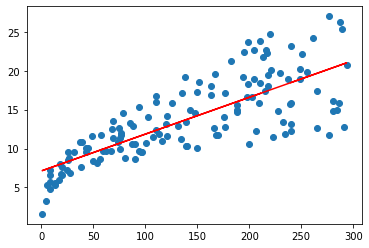

In [67]:
plt.scatter(x_train_reshape,y_train)
plt.plot(x_train_reshape,li.predict(x_train_reshape),color="red")


In [69]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_predict))

10.142561259178906


In [70]:
print(r2_score(y_test,y_predict))

0.6199963914492881


In [74]:
num=np.sum((y_test-y_predict)**2)
den=np.sum((y_test-y_mean)**2)
r_square=1-(num/den)
r_square

0.6320958425693174